# Building a damage assessment system for aerospace industry 

**Context** 

We aim to build a machine learning system that will determine, for a given damage on the aircraft, if it is allowable or not : 

- Allowable damage (output = 0 , negative) means that aircraft can keep flying without any danger. Only an inspection program is recommended in this case.  
- Not allowable damage (output = 1, positive) means that the aircraft should be kept on ground for maintenance. The airframer should be contacted for damage justification. This process is costly and requires good planification.  

Knowing if a damage is not allowable could be a good benefit for airlines. Knowing it in advance and without specifying all the required features must be far better.  

**Summary**

We assume we have the necessary data (it is usually a sensitive data). We explore it with Pandas, Numpy, Seaborn and Pyplot. We make predictions with some appropriate machine learning algorithms such as decision trees, SVM or Naive Bayes. We define a number of performance metrics specific to our problem such as F1 score and computing times, then we pick the one which will suit better to our business problem.
Then, we tried an approach based on ensemble learning to see if we can do better. 

Finally, we investigate the possibility to build a probabilistic system which can provide relevant answers without knowing all 9 features. 


# Project  
## Import libraries

In [1]:
# author: houcem
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline
np.random.seed(0)

## Importing data set 
The data is sensitive. In this project no exhaustive details are provided about it. 

In [2]:
#Loard the data
data = pd.read_csv('/home/houcem/Bureau/Training_data1.csv')
#drop the index column 
data = data.drop("Unnamed: 0",axis = 1)
data.head()
print("Damage data matrix shape is " , data.shape)
print("Its type is :  ",  type(data))

Damage data matrix shape is  (1000, 10)
Its type is :   <class 'pandas.core.frame.DataFrame'>


In [3]:
data.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,y
0,False,True,False,0.24,1.17,10.76,232.16,69.30,334.05,0
1,False,True,False,0.23,1.16,11.17,144.87,107.79,179.21,0
2,False,True,False,0.16,1.23,6.96,94.04,65.41,97.57,0
3,False,False,False,0.71,1.51,42.00,422.47,244.88,423.47,1
4,False,True,False,0.14,1.72,5.79,92.03,64.42,93.43,0


We are provided with a data set of 1000 damages. Each damage is described with 9 features. We can notice that x1,x2,x4 are boolean features and that x3..x9 are numerical. This data is sensitive, so no exaustive details are provided about its meaning. 

**Features and Labels **

**Features**

**(x1,x2,x3) : booleans** 

We know that x1,x2 and x3 are answers to some basic questions about damage properties : 
- Is there any other damage in the area ? 
- Is there more than one different damage type in the area ? 
- Does the damage cross a riveted area ?

**(x4,x5,x6,x7,x8,x9) : numerical** 

These features are related to geometric measurement : distances, thicknesses and diameters related to damage. 
For example :  x5 describes the nominal thickness of the damaged panel  

**Label**

**y : 0 or 1 **

- A damage labeled 0 is a negative damage. That means that it doesn't represent a major danger. Hence, the airplane can keep flying safely. 
- A damage labeled 1 is positive damage. That means that it requires to keep the airplane on ground (AOG) and send it to a maintenance center and contact the airframer for damage justification

## Quick insights 

In [4]:
#Let's get an overall description of our numerical values 
data.describe()

,x4,x5,x6,x7,x8,x9,y
count,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.33014,1.434470,18.851180,260.368290,76.672000,320.792680,0.250000
std,0.32173,0.330876,23.829437,156.693256,81.221931,152.445572,0.433229
min,0.10000,1.000000,4.010000,1.980000,0.000000,3.800000,0.000000
25%,0.14000,1.140000,6.440000,113.570000,0.000000,183.005000,0.000000
50%,0.20000,1.270000,9.610000,251.085000,64.175000,340.975000,0.000000
75%,0.30250,1.730000,14.805000,430.910000,105.957500,484.952500,0.250000
max,1.59000,2.000000,123.410000,499.770000,495.920000,500.770000,1.000000


- y.mean() = 0.25 , That means that 25% of provided data is positive. We clearly have a problem of unbalanced data. Choosing F1_score as a performance metric is a best practice 

- At least 25 % of x8 values are equal to 0. Let's investigate this further with histograms  

## Define X and y

In [5]:
#preprocess data 
X = data.drop("y", axis = 1)
y = data.y
# data set to use 
print(" the shape of X is " , X.shape)
print(" the shape of y is ", y.shape)
print(" Positive cases represent {}% of all data".format(100*y.mean()))

 the shape of X is  (1000, 9)
 the shape of y is  (1000,)
 Positive cases represent 25.0% of all data


## Descriptive statistics 

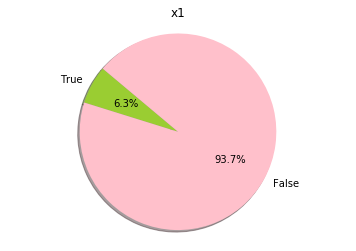

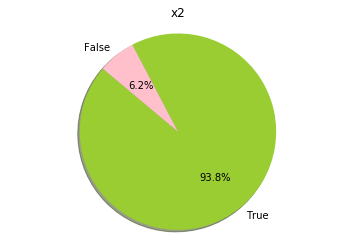

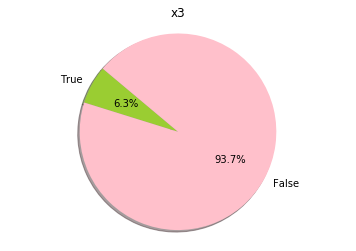

In [6]:
#X.ix[:,0:3].hist(figsize=[4,5], bins= 20)

labels = 'True', 'False'
colors = ['yellowgreen', 'pink']

sizes = [(X.x1).sum(), 1000 - (X.x1).sum() ]
plt.show()


boolean_features = ['x1','x2','x3']
for i in boolean_features:
    sizes = [(X[i]).sum(), 1000 - (X[i]).sum() ]
    # Plot
    plt.pie(sizes, labels=labels, colors=colors,
    autopct='%1.1f%%', shadow=True, startangle=140)
    plt.axis('equal')
    plt.title(i)
    plt.show()

- We notive that each boolean feature takes a specific value for 93% of the time. 
For instance, x3 is equal to FALSE for 93% of the time. 


Let's investigate more this insight and see the impact on classification


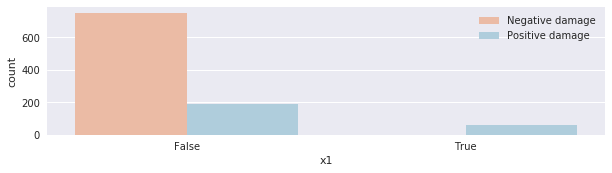

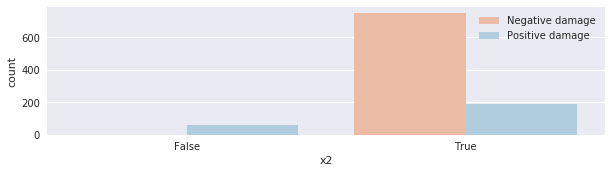

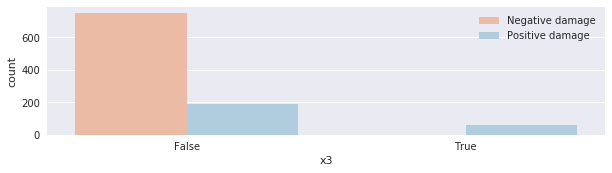

In [7]:
figsz =[10,8]
for i,name in enumerate(boolean_features):
    sns.set(style="darkgrid")
    plt.figure(figsize= figsz) 
    plt.subplot(3, 1, i+1)
    ax = sns.countplot(x= name, data = X ,hue=y, palette = "RdBu")
    # Add legend to plot
    plt.legend(["Negative damage","Positive damage" ])
    plt.show() 

- It is clear that x1,x2,x3 have an important influence on classification.
- For example we can say that : when x3 is equal to True , the damage is positive (high probability). 

A decision tree model can be a good candidate to solve this classification problem 

Now let's have some insights the other features

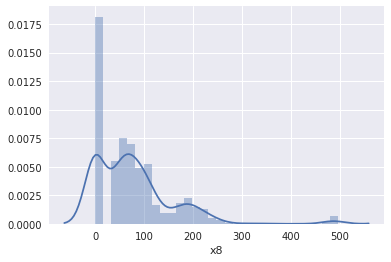

In [8]:
#x8 distribution 
sns.distplot(X.x8,bins=30)
plt.show()

- In x8 histogram we can notice that it is not a normal distribution. 
Some values are more luckily to occur. The value 0 is particularly present

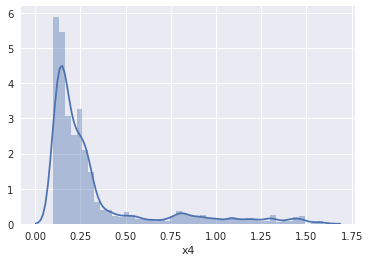

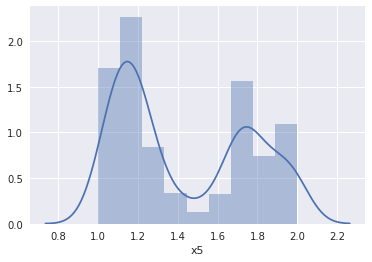

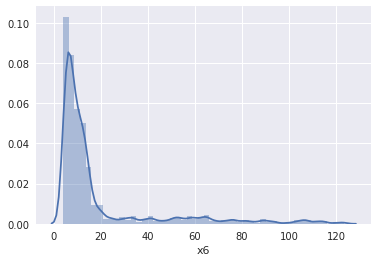

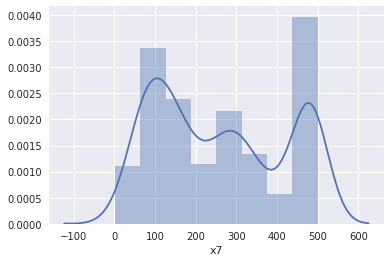

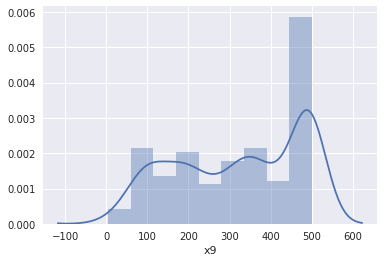

In [10]:
#other features distributions
for i in ["x4","x5","x6","x7","x9"]:
    sns.distplot(X[i])
    plt.show()

Let's see how positive and negative damages are related to these features distributions 

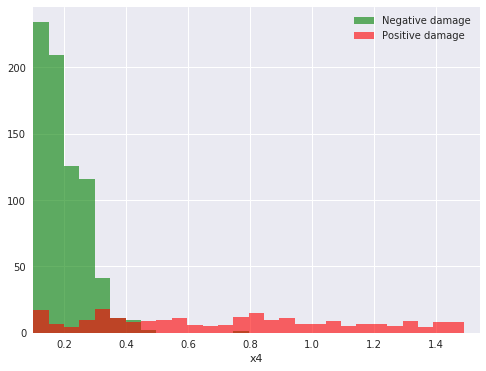

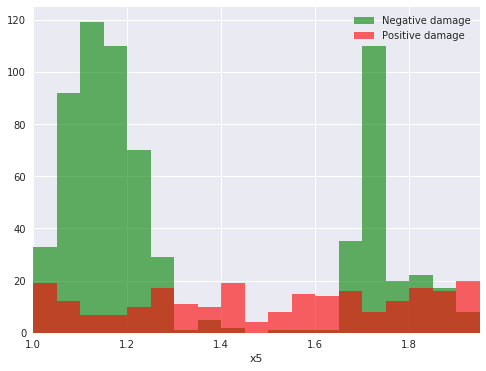

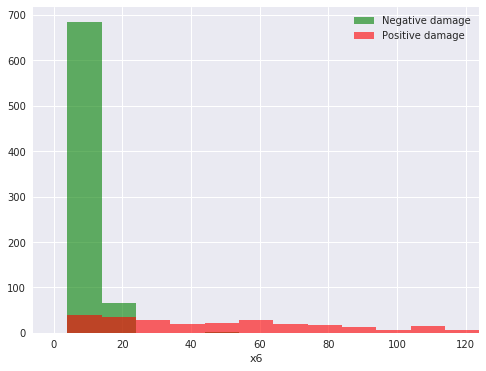

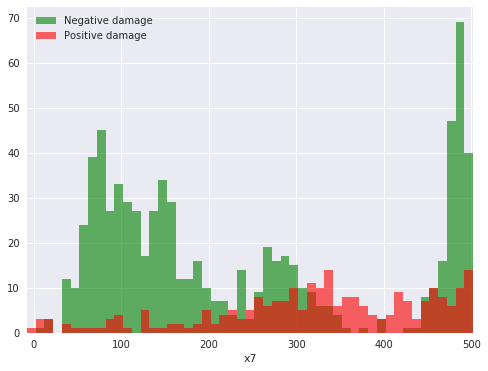

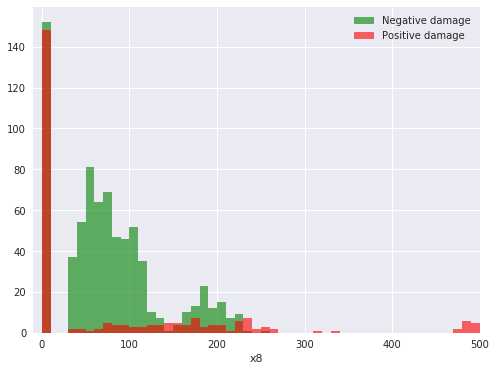

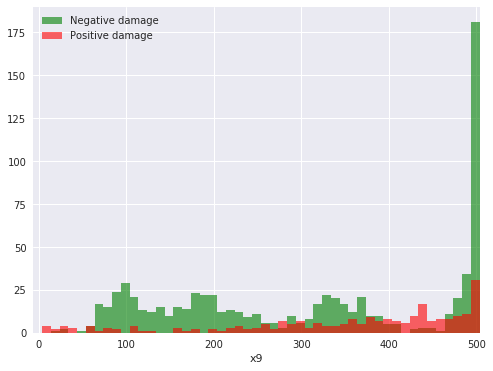

In [11]:
def plot_feature(data, outcomes, key):
    # Merge data and outcomes into single dataframe
    all_data = pd.concat([data, outcomes.to_frame()], axis = 1)
    # Create outcomes DataFrame
    all_data = all_data[[key, 'y']]
    # Create plotting figure
    plt.figure(figsize=(8,6))
    # Remove NaN values from Age data
    all_data = all_data[~np.isnan(all_data[key])]
    # Divide the range of data into bins and count survival rates
    min_value = all_data[key].min()
    max_value = all_data[key].max()
    value_range = max_value - min_value
    if key in ["x6", "x7", "x8", "x9"]:
        bins = np.arange(min_value - 10 , max_value + 10, 10)
    else:
        if key == "x5": 
            bins = np.arange(1, 2, 0.05)
        else:
            bins = np.arange(min_value, max_value, (value_range/30))
    # Overlay each bin's outcome rates
    neg_vals = all_data[all_data['y'] == 0][key].reset_index(drop = True)
    pos_vals = all_data[all_data['y'] == 1][key].reset_index(drop = True)
    plt.hist(neg_vals, bins = bins, alpha = 0.6, color = 'green', label = 'Negative damage')
    plt.hist(pos_vals, bins = bins, alpha = 0.6,color = 'red', label = 'Positive damage')
    plt.xlabel(key)
    # Add legend to plot
    plt.xlim(bins.min(), bins.max())
    plt.legend(framealpha = 0.8)

features = ["x4","x5","x6","x7","x8","x9"] 
for i in features:
    plot_feature(X, y, i)

We notice that we can find a number of thresholds that can help to determine if a damage is positive. For example, according to x4 histogram, we can tell that if x4 > 0.5 then the damage is positive.  Also, if x8 is equal to 0 then the damage is more lickely to be positive. This confirms the idea that a decision tree model is a good candidate to this problem. 

Let's have another perspective with the help of scatter matrix 

/home/houcem/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


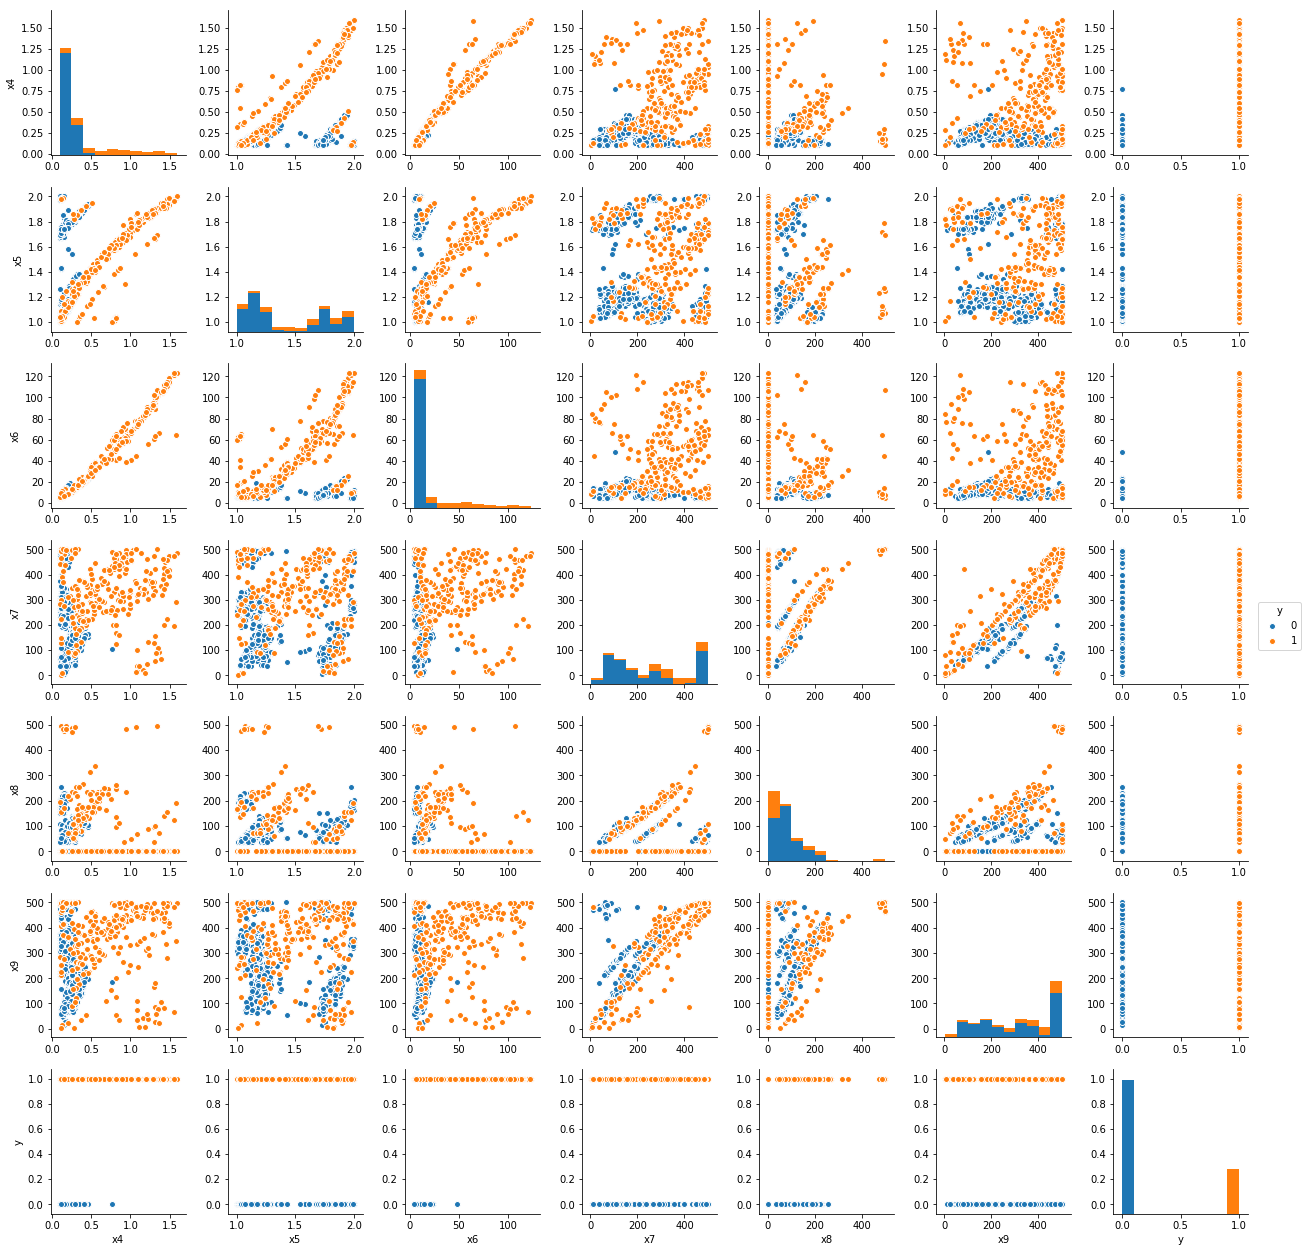

In [4]:
#pd.plotting.scatter_matrix(X.ix[:,3:(-1)],c=y, figsize= [8, 8], s= 50 , marker = 'D', diagonal = "kde")
sns.pairplot(data = data.ix[:,3:],hue = "y") 
plt.show()

It is intresting to recall that in our data we have more blue points ( negative damages )  than orange points (positive damages). We actually have 3 times more blue points than orange points. 
But in the previous plotsn we can see that blue points (negative damages) tend to occupy very restricted areas in features space. If you pick a random point in the space, you are more likely to get an orange point (positive damage) . 

This can be explained by the notion of covered damages in aerospace industry. When an aircraft is sold , not all damages are covered and calculated in a way to determine if they are allowable or not. So only a restricted area is calculated and justified. 
All damages coming out of the scope of covered areas are considered not allowable (positive) and require to stop the airplane and go for a closer check. 

# Preprocess categorical features 
Before doing any machine learning, we should replace boolean features (or categorical) with numerical features. 

In [12]:
for i in ["x1","x2","x3"]:
    X[i] = X[i].replace(to_replace = [True,False], value = [1,0])
X.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9
0,0,1,0,0.24,1.17,10.76,232.16,69.30,334.05
1,0,1,0,0.23,1.16,11.17,144.87,107.79,179.21
2,0,1,0,0.16,1.23,6.96,94.04,65.41,97.57
3,0,0,0,0.71,1.51,42.00,422.47,244.88,423.47
4,0,1,0,0.14,1.72,5.79,92.03,64.42,93.43


# Train test split 

In [20]:
from sklearn.model_selection import train_test_split

#skrewed data, hence stratified split is better 
#let's conduct a stratified train test split. 10 % of data set is dedicated to testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1,
                                                    random_state = 42, 
                                                    stratify = y) 

In [16]:
# check the split 
print ("Training set has {} samples ".format(X_train.shape[0]) ) 
print ("Testing set has {} samples ".format(X_test.shape[0]) ) 
print ("Positive damages proportion in training set is ", y_train.mean())
print ("Positive damages proportion in testing set is ", y_test.mean())

Training set has 900 samples 
Testing set has 100 samples 
Positive damages proportion in training set is  0.25
Positive damages proportion in testing set is  0.25


# Some useful functions for classification 

- train_classifier - takes as input a classifier and training data and fits the classifier to the data.

- predict_labels - takes as input a fit classifier, features, and a target labeling and makes predictions using the F1 score.

- train_predict - takes as input a classifier, and the training and testing data, and performs train_clasifier and predict_labels.
This function will report the F1 score for both the training and testing data separately.

- plot_learning_curves - takes as input a classifier, training data, training labels, cross validation strategy, a perforamnce metric and a plot title . It perform the plot of learning curves by varying the amount of training samples. 

In [34]:
# define useful functions 
from time import time 
from sklearn.metrics import f1_score

def train_classifier(clf, X_train, y_train):
    #Fits a classifier to the training data.

    # Start the clock, train the classifier, then stop the clock
    start = time()
    clf.fit(X_train, y_train)
    end = time()

    # Print the results
    print("Trained model in " + str(end - start) +  " seconds" )


def predict_labels(clf, features, target):
    #Makes predictions using a fit classifier based on F1 score

    # Start the clock, make predictions, then stop the clock
    start = time()
    y_pred = clf.predict(features)
    end = time()

    # Print and return results
    print("Made predictions in {:.4f} seconds.".format(end - start))
    return f1_score(target.values, y_pred, pos_label = 1 )


def train_predict(clf, X_train, y_train, X_test, y_test):
    #Train and predict using a classifer based on F1 score

    # Indicate the classifier and the training set size
    print("")
    print("Training a {} using a training set size of {}. . .".format(clf.__class__.__name__, len(X_train)))

    # Train the classifier
    train_classifier(clf, X_train, y_train)

    # Print the results of prediction for both training and testing
    print("F1 score for training set: {:.4f}.".format(predict_labels(clf, X_train, y_train)))
    print("F1 score for test set: {:.4f}.".format(predict_labels(clf, X_test, y_test)))

    
from sklearn.model_selection import learning_curve
def plot_learning_curves(clf, X_train, y_train, cv, score, random_state, title):
    #plot the learning curves of a classifier 
    samples = np.array([ 0.1, 0.33, 0.55, 0.78, 1. ])
    train_sizes, train_scores, test_scores = learning_curve(clf, X_train, y_train, 
                                                        train_sizes= samples,
                                                        cv=ssscv, 
                                                        scoring=f1_scorer,
                                                        exploit_incremental_learning=False,
                                                        n_jobs=1,
                                                        random_state=42)
    plt.figure()
    plt.title(title)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    plt.show()

# Scaling 

Scaling is useful for some algorithms like SVM, logistic regression and neural network. Decision trees don't usually require scaling. However, it is useful if you intend to compare performance with other data or other methods.

Let's add a function for scaling : 

In [22]:
from sklearn.preprocessing import StandardScaler

# We fit the scaler to training data and then we transform training data and testing data with respect to the fitting. 
def scale(training,testing):
    scaler = StandardScaler()
    scaler.fit(training)
    X_train = pd.DataFrame(scaler.transform(training), columns=training.columns)
    X_test = pd.DataFrame(scaler.transform(testing),columns=testing.columns)
    return X_train,X_test

#scale training and testing data 
X_train,X_test = scale(X_train,X_test)

# Algorithms 


We have a supervised learning classification problem. One good practice in machine learning is to start by a number of different algorithms. Then, seeing their preliminar results (without any preliminar optimisation) will help to pick the one which suits the better your needs.  
Scalability, computing costs and accuracy can be among the criteria which will be taken into consideration during the selection process. Every business problem has its own criteria. 


*** How are we going to choose ? ***


Let's start with a list of algorithms and then compare them according to these criteria : 

- F1 scores : very important to use with unbalanced data. Having a higher F1 score is better. 
- Transparency & interpretability  : is the ability to understand how and why the classifier takes a decision. This issue is very relevant to aerospace industry. The more transparent is the model the better it is accepted
- How much data is needed to get a good classifier : this question is important because in our context, we don't usually have large amounts of examples 
- Eventually computing times 

In [23]:
# import different algorithms  
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.neural_network import MLPClassifier 
from sklearn.tree import DecisionTreeClassifier

In [24]:
# Initialize models
clf_A = GaussianNB() 
clf_B = LogisticRegression(random_state=42)
clf_C = LinearSVC(random_state=42)
clf_D = MLPClassifier(random_state=42)
clf_E = DecisionTreeClassifier(random_state = 42)  #without specifying a max_depth, the algorithm is prone 
                                                   #to overfiting. But this is fine for a preliminary approach 

In [15]:
#the training data size is 900. Let's increase the training data size progressively 
n_training_examples = [300, 600, 900]
for clf in [clf_A, clf_B, clf_C, clf_D, clf_E]:
    print("\n{}: \n".format(clf.__class__.__name__))
    for n in n_training_examples:
        train_predict(clf, X_train[:n], y_train[:n], X_test, y_test)



GaussianNB: 


Training a GaussianNB using a training set size of 300. . .
Trained model in 0.29622530937194824 seconds
Made predictions in 0.0019 seconds.
F1 score for training set: 0.9008.
Made predictions in 0.0015 seconds.
F1 score for test set: 0.8936.

Training a GaussianNB using a training set size of 600. . .
Trained model in 0.0037119388580322266 seconds
Made predictions in 0.0012 seconds.
F1 score for training set: 0.8889.
Made predictions in 0.0013 seconds.
F1 score for test set: 0.8936.

Training a GaussianNB using a training set size of 900. . .
Trained model in 0.002881288528442383 seconds
Made predictions in 0.0015 seconds.
F1 score for training set: 0.8998.
Made predictions in 0.0013 seconds.
F1 score for test set: 0.8936.

LogisticRegression: 


Training a LogisticRegression using a training set size of 300. . .
Trained model in 0.08200860023498535 seconds
Made predictions in 0.0463 seconds.
F1 score for training set: 0.9489.
Made predictions in 0.0007 seconds.
F1 sco

/home/houcem/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Trained model in 0.42601919174194336 seconds
Made predictions in 0.0008 seconds.
F1 score for training set: 0.9565.
Made predictions in 0.0004 seconds.
F1 score for test set: 0.9388.

Training a MLPClassifier using a training set size of 600. . .
Trained model in 0.4968993663787842 seconds
Made predictions in 0.0010 seconds.
F1 score for training set: 0.9619.
Made predictions in 0.0005 seconds.
F1 score for test set: 0.9388.

Training a MLPClassifier using a training set size of 900. . .
Trained model in 0.7537357807159424 seconds
Made predictions in 0.0012 seconds.
F1 score for training set: 0.9865.
Made predictions in 0.0004 seconds.
F1 score for test set: 0.9600.

DecisionTreeClassifier: 


Training a DecisionTreeClassifier using a training set size of 300. . .
Trained model in 0.0012543201446533203 seconds
Made predictions in 0.0002 seconds.
F1 score for training set: 1.0000.
Made predictions in 0.0002 seconds.
F1 score for test set: 0.9200.

Training a DecisionTreeClassifier using

***Classifer 1 - Naive Bayes (GaussianNB)***

| Training Set Size | Training Time | Prediction Time (test)| F1 Score (train)| F1 Score (test)| 
| ----| ------------ | -------- | ----------- | ------------ |
| 300 |    0.0025    | 0.0007   |  0.9333     |   0.8936     |
| 600 |    0.0012    | 0.0007   |  0.9286     |   0.8936     |
| 900 |    0.0012    | 0.0007   |  0.9387     |   0.8936     |


***Classifer 2 - Logistic Regression***

| Training Set Size | Training Time | Prediction Time (test)| F1 Score (train)| F1 Score (test)| 
| ----| ------------ | -------- | ----------- | ------------ |
| 300 |    0.0820    | 0.0463   |  0.9489     |   0.8936     |
| 600 |    0.0063    | 0.0006   |  0.9362     |   0.9167     |
| 900 |    0.0080    | 0.0132   |  0.9412     |   0.9388     |



***Classifier 3 - Support vector machine : Linear SVC***

| Training Set Size | Training Time | Prediction Time (test)| F1 Score (train)| F1 Score (test)| 
| ----| ------------ | -------- | ----------- | ------------ |
| 300 |    0.0061    | 0.0007   |  0.9489     |   0.9167     |
| 600 |    0.0187    | 0.0005   |  0.9362     |   0.9388     |
| 900 |    0.0178    | 0.0004   |  0.9390     |   0.9167     |



***Classifier 4 - Neural Network  : MLPClassifier***

| Training Set Size | Training Time | Prediction Time (test)| F1 Score (train)| F1 Score (test)| 
| ----| ------------ | -------- | ----------- | ------------ |
| 300 |    0.4260    | 0.0008   |  0.9565     |   0.9388     |
| 600 |    0.4968    | 0.0010   |  0.9619     |   0.9388     |
| 900 |    0.7537    | 0.0012   |  0.9865     |   0.9600     |



***Classifier 5 - Decision tree : DecisionTreeClassifier***

| Training Set Size | Training Time | Prediction Time (test)| F1 Score (train)| F1 Score (test)| 
| ----| ------------ | -------- | ----------- | ------------ |
| 300 |    0.0012    | 0.0002   |  1.0000     |   0.9200     |
| 600 |    0.0035    | 0.0002   |  1.0000     |   0.9412     |
| 900 |    0.0036    | 0.0003   |  1.0000     |   0.9231     |


- MLPClassifier seems to have very good performances but in our context, transparency and intrepretability are very important. More over, its training times are far larger than other algorithms. So we eliminate Neural networks.

- SVM  algorithms complexity is usually high, and interpretability is also impaired.  For this reason we eliminated it. 

- Naive Bayes works pretty well on small data sets and is fast and scalable, but it considers that all features are unrelated. It can't learn relationships between them. We know in our business case that this aspect in important. So let's look at other algorithms 

- We are left with logistic regression and decision tree. Despite being prove to overfitting (because of non specified max_depth ), decision tree showed slightly better F1 scores and can do probably better with some hyperparameter optimization. The two algorithms are transparent and provided good F1 scores values. Though, logistic regression appears to be more expensive, especially for small data sets. 

---> Decision tree classification confirmed our intuition about its relevance in our context. It deals better with thresholds. It is transparent, fast and has good F1 scores. It also can do better with some hyperparameter optimization. Furthermore, it provides the possibility to apply ensemble learning via boosting or bagging.


Let's try to tune it now, and get the most of it. 

# Decision tree is selected. Now let's tune hyperparameters 

In [30]:
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.cross_validation import StratifiedShuffleSplit


# Create the hyperparameters list we wish to tune
criterion = ['gini','entropy']
max_depth = [3,5,6,8,10,12,20]
min_samples_leaf = [3,4,5,10,50]

param_grid = dict(criterion=criterion, max_depth=max_depth, min_samples_leaf=min_samples_leaf)
        

In [31]:
# Initialize the classifier
clf = DecisionTreeClassifier(random_state=42)

# Make an f1 scoring function using 'make_scorer' 
f1_scorer = make_scorer(f1_score, pos_label= 1 )

# Cross validation strategy is : Stratified Shuffle Split
ssscv = StratifiedShuffleSplit(y_train, n_iter=10, test_size=0.1)

#Perform grid search on the classifier using the f1_scorer as the scoring method
grid_obj = GridSearchCV(clf, param_grid, cv=ssscv, scoring=f1_scorer)

#Fit the grid search object to the training data and find the optimal parameters
grid_obj = grid_obj.fit(X_train, y_train)

In [32]:
# Get the estimator
clf = grid_obj.best_estimator_

# Report the final F1 score for training and testing after parameter tuning
print("Tuned model has a training F1 score of {:.4f}.".format(predict_labels(clf, X_train, y_train)))
print("Tuned model has a testing F1 score of {:.4f}.".format(predict_labels(clf, X_test, y_test)))

print( "\nHyperparameters of the best decision tree model are :\n")
print(" criterion =" , clf.get_params()['criterion'])
print(" max_depth =" , clf.get_params()['max_depth'])
print(" min_samples_leaf = ", clf.get_params()['min_samples_leaf'])

Made predictions in 0.0006 seconds.
Tuned model has a training F1 score of 0.9844.
Made predictions in 0.0008 seconds.
Tuned model has a testing F1 score of 0.9412.

Hyperparameters of the best decision tree model are :

 criterion = entropy
 max_depth = 12
 min_samples_leaf =  4


 We have good performance. Let's check learning curves and verify the bias-variance trade off :

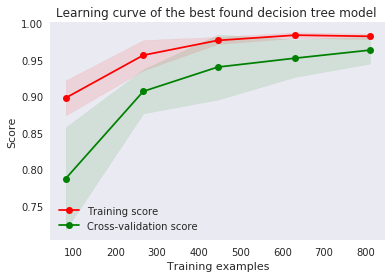

In [47]:
plot_learning_curves(clf, X_train, y_train, cv = ssscv, score = f1_scorer ,
                     random_state = 42 ,
                     title = "Learning curve of the best found decision tree model ")

- The model behaves fine. 
Let's select it and cross validate it using all the provided data set 

In [48]:
from sklearn.model_selection import cross_val_score

cv_f1_scores = cross_val_score(clf, X, y, scoring = f1_scorer, cv = 10 )
print( "Average F1 score: ", np.round( np.mean( cv_f1_scores ), 2 ) )
print( "Standard deviation in F1 score: ", np.round( np.std( cv_f1_scores ), 2) )

Average F1 score:  0.96
Standard deviation in F1 score:  0.02


With hyperparameters optimization, we improved our F1 score. Now we have a better model with an F1 score of 96% (+/- 2% )

Decision trees are weak learners , it could require some improvements such as reducing standard deviation. Ensemble learning is a good technique for that. Ensemble methods combines several decision trees to produce better predictive performance than utilizing a single decision tree. 

# Bagging decision trees : Random forest

The principle behind the ensemble model is that a group of weak learners come together to form a strong learner. The two main techniques are : 

- Bagging (Bootstrap Aggregation) is usually used when we aim to reduce the variance of a decision tree. The idea is to create several subsets of data from training sample chosen randomly with replacement. Now, each collection of subset data is used to train their decision trees. As a result, we end up with an ensemble of different models. Average (or votes ) of all the predictions from different trees are used which is more robust than a single decision tree. The technique we use is : random forest 

- Boosting :  we fit consecutive trees (random sample) and at every step, the goal is to solve for net error from the prior tree. When an input is misclassified by a hypothesis, its weight is increased so that next hypothesis is more likely to classify it correctly. By combining the whole set at the end converts weak learners into better performing model. We can use :  Gradient boosting technique

Let's use bagging 

In [49]:
#Bagging
from sklearn.ensemble import RandomForestClassifier


RandomForest = RandomForestClassifier(random_state=42)

criterion = ['gini', 'entropy']
n_estimators = [10,50,100]
max_depth = [2,8,15]
min_samples_leaf =  [2,3,6]

param_grid = dict(criterion=criterion, n_estimators=n_estimators,max_depth=max_depth
                  ,min_samples_leaf=min_samples_leaf)

gridSearcher = GridSearchCV(RandomForest,
                            param_grid,
                            cv= ssscv,
                            n_jobs= 3,
                            verbose= 1,
                            scoring= f1_scorer,
                            refit = 'f1',
                            )

gridSearcher.fit(X_train, y_train)

Fitting 10 folds for each of 54 candidates, totalling 540 fits


[Parallel(n_jobs=3)]: Done 240 tasks      | elapsed:   13.2s
[Parallel(n_jobs=3)]: Done 540 out of 540 | elapsed:   35.9s finished


GridSearchCV(cv=StratifiedShuffleSplit(labels=[0 0 ..., 0 0], n_iter=10, test_size=0.1, random_state=None),
       error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=3,
       param_grid={'criterion': ['gini', 'entropy'], 'n_estimators': [10, 50, 100], 'max_depth': [2, 8, 15], 'min_samples_leaf': [2, 3, 6]},
       pre_dispatch='2*n_jobs', refit='f1',
       scoring=make_scorer(f1_score, pos_label=1), verbose=1)

In [53]:
print("best parameters found are \n" ,gridSearcher.best_params_)

# Get the best random forest estimator
best_forest = gridSearcher.best_estimator_
best_forest.fit(X_train,y_train)

# Report the final F1 score for training and testing after GreadSearch
print("\nBagging decision trees has a training F1 score of {:.4f}.".format(predict_labels(best_forest, X_train, y_train)))
print("Bagging decision trees has a testing F1 score of {:.4f}.".format(predict_labels(best_forest, X_test, y_test)))
print( "\nHyperparameters of random forest tree model are :\n")
print(" criterion =" , best_forest.get_params()['criterion'])
print(" max_depth =" , best_forest.get_params()['max_depth'])
print(" min_samples_leaf =" , best_forest.get_params()['min_samples_leaf'])

best parameters found are 
 {'criterion': 'entropy', 'max_depth': 15, 'min_samples_leaf': 3, 'n_estimators': 100}
Made predictions in 0.0164 seconds.

Bagging decision trees has a training F1 score of 0.9933.
Made predictions in 0.0092 seconds.
Bagging decision trees has a testing F1 score of 0.9600.

Hyperparameters of random forest tree model are :

 criterion = entropy
 max_depth = 15
 min_samples_leaf = 3


- let's check learning curve

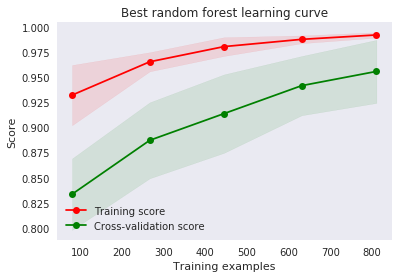

In [52]:
plot_learning_curves(best_forest, X_train, y_train, cv = ssscv, score = f1_scorer ,
                     random_state = 42 ,
                     title = "Best random forest learning curve")

In [54]:
from sklearn.model_selection import cross_val_score

cv_f1_scores = cross_val_score(best_forest, X, y, scoring = f1_scorer, cv = 10 )
print( "Average F1 score: ", np.round( np.mean( cv_f1_scores ), 2 ) )
print( "Standard deviation in F1 score: ", np.round( np.std( cv_f1_scores ), 2) )

Average F1 score:  0.97
Standard deviation in F1 score:  0.03



| Algorithm | Training F1 score | Testing F1 score | Average F1 score (validation) | Standard deviation in F1 score (validation) |
| --------- | --------- | --------- | --------- | --------- | 
| Decision tree  | 0.9844 | 0.9412 | 0.96 | 0.02 | 
| Random forest |  0.9933 | 0.9600 | 0.97 | 0.03 |

We achieved a slight improvement in F1 score. Though, no further progress is seen in standard deviation. 
We can finally select the random forest for future applications

# Train models able to predict without knowing all 9 features 

A business challenge in our context is to provide airlines the ability to determine a probabilistic answer about a damage even without specifying all inputs. The reason is that some features need large ressources and amount of time to be measured. Let's assume that the easiest feature to determine are x1,x2,x3 and then comes x4, x5 and so on until x9.   

In this section we compute 7 models, each one of them is trained with a specific number of features. For instance : 
- Model 1 predicts with three features x1,x2 and x3  
- Model 2 predicts with x1,x2,x3, and x4 
- Model 3 predicts with x1,x2,x3,x4 and x5
- And so on until Model 7 which will predict with all features 

(In this project, we choose not to show the exact feature selection strategy that we found.)

Every model is determined with the help of a GridSearch and decision tree. 

In [55]:
# Create the hyperparameters list we wish to tune
criterion = ['gini','entropy']
max_depth = [3,5,6,8,10,12,20]
min_samples_leaf = [3,4,5,10,50]

param_grid = dict(criterion=criterion, max_depth=max_depth, min_samples_leaf=min_samples_leaf)


models = []

start = time()
for i in range(3,10,1):
    print("\n Model number {} is trained and optimized on features : ".format(i-2), X_train.ix[:,0:i].columns)
    dt = DecisionTreeClassifier(random_state=42)
    grid_obj = GridSearchCV(dt, param_grid, cv=ssscv, scoring=f1_scorer)
    grid_obj = grid_obj.fit(X_train.ix[:,0:i], y_train)
    best_estimator = grid_obj.best_estimator_
    models.append(best_estimator)
end = time()

/home/houcem/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:18: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated



 Model number 1 is trained and optimized on features :  Index(['x1', 'x2', 'x3'], dtype='object')


/home/houcem/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/houcem/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/houcem/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/houcem/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/houcem/anaconda3/lib/python3.6/site-packages/sklearn/m


 Model number 2 is trained and optimized on features :  Index(['x1', 'x2', 'x3', 'x4'], dtype='object')

 Model number 3 is trained and optimized on features :  Index(['x1', 'x2', 'x3', 'x4', 'x5'], dtype='object')

 Model number 4 is trained and optimized on features :  Index(['x1', 'x2', 'x3', 'x4', 'x5', 'x6'], dtype='object')

 Model number 5 is trained and optimized on features :  Index(['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7'], dtype='object')

 Model number 6 is trained and optimized on features :  Index(['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8'], dtype='object')

 Model number 7 is trained and optimized on features :  Index(['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9'], dtype='object')


In [57]:
print("Models completed in {:.4f} seconds.\n ".format(end - start))
print(models)

Models completed in 25.3190 seconds.
 
[DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=4, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best'), DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best'), DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=20,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=4, min_samples_split=2,
            min_wei

## Testing a progressive feature assignment 
For a new unseen damage selected from test set , this function selects progressively the features and shows probabilities in real time 

In [58]:
def progressive_feature_selection(n):
    print("---------------Progressive feature selection process  ------------------------")
    print("We have a new damage:\n", X_test.ix[n,:])   
    for i,model in enumerate(models):
        j=i+3
        a = X_test.ix[n,0:j]
        x = np.array(a)
        x = x[:,np.newaxis]
        x = x.T
        pred = model.predict(x)
        print("\n With only {} feature(s) in input, the probability of having a negative damage is {} and of having a positive damage is {} "
              .format(j, model.predict_proba(x)[:,0] ,model.predict_proba(x)[:,1] )  )
        print("The prediction is ", model.predict(x))
        
def compute_progressive_selection(n):
    print("New unseen damage is\n",X_test.ix[n,:])
    print("\nKnown corresponding label is : ", y_test.values[n])
    progressive_feature_selection(n)

In [59]:
#some rows numbers from testing data 
#rows = [1,6,10,20,60,68,17,15]
rows = [1,6,10]
for i in rows :    
    print("\n*************************** Read test example from row {} *******************************************\n".format(i))
    compute_progressive_selection(i)


*************************** Read test example from row 1 *******************************************

New unseen damage is
 x1   -0.252646
x2    0.252646
x3   -0.252646
x4   -0.625979
x5    0.851311
x6   -0.577774
x7    1.483344
x8   -0.941411
x9    1.124793
Name: 1, dtype: float64

Known corresponding label is :  0
---------------Progressive feature selection process  ------------------------
We have a new damage:
 x1   -0.252646
x2    0.252646
x3   -0.252646
x4   -0.625979
x5    0.851311
x6   -0.577774
x7    1.483344
x8   -0.941411
x9    1.124793
Name: 1, dtype: float64

 With only 3 feature(s) in input, the probability of having a negative damage is [ 0.85012594] and of having a positive damage is [ 0.14987406] 
The prediction is  [0]

 With only 4 feature(s) in input, the probability of having a negative damage is [ 0.93939394] and of having a positive damage is [ 0.06060606] 
The prediction is  [0]

 With only 5 feature(s) in input, the probability of having a negative damage is 

/home/houcem/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:16: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  app.launch_new_instance()


*** This technique can encourage airlines to determine, first, the easy-to-determine features. Feeding the system with them , could be sufficient to determine with high accuracy the class of a given damage.***  This can represent a tremendous help to airlines to improve their plannings, operationnal efficiency and damage management processes. 
  

# Conclusion : 

This POC showed that it is possible to extract value from damage data by doing machine learning. We could predict damage categories with good accuracy levels despite the presence of unbalanced data. We also identified a promising method which could save huge amounts of time (and thus money and efficiency) for airlines : Having good predictions without specifying all features. First provide the few easy-to-measure features to the system and save time spent on measurements. 

What we do need, though, is to face the challenges of improving this method : 
- Business challenges : certification, introducing a safety performance metric, encouraging airlines to share their data...   
- Technical challenges : Getting real data, dimensionality reduction, feature selecltion strategy by eliminating feature with low variance ...
